# Pseudo-random number generators
This notebook is an introduction to PRNGs such as those that are used in Monte Carlo (MC) work. These are *pseudo* because it is very difficult to generate true random numbers in a deterministic state machine (i.e. computer). True randomness occurs in some physical processes such as nuclear decay and photon detection among others. You will use this notebook to explore the available methods for generating pseudorandom numbers. We will also compare various methods and determine which are best suited to MC work.

There are three built-in random number generators:
 - native python (load via `import random`)
 - numpy (load via `import numpy.random`)
 - Crypto (load via `import Crypto.Random.random`)
 
and a fourth method called the *linear congruential generator*:
$$x_{n+1} = (a x_n + b) \mod c$$
Where we start with $x_0$ and generate a sequence using specific values of $a$, $b$, and $c$. A certain set of these values was been widely used in the early days of computational physics, it is called *Randu*:
$a = 65539, b = 0, c = 2^{31}$. We'll compare this method to two of the methods listed above and see how random each generator is (and how fast).

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

##  Code a linear congruential generator:
Implement a function called `lcg` that takes parameters: `a`,`b`,`c`, `N`, and `seed`. Let `N=10000` and `seed=1` by default. It should return a numpy array of length `N` that has the sequence of pseudo-random numbers generated by the linear congruential generator.

In [3]:
# Solution
def lcg(a,b,c,N=10000,seed=1):
    mydata = []
    x = seed
    for i in range(N):
        x = (a*x + b) % c
        mydata.append(x / c)
    return np.array(mydata)

### Use the parameters a = 12, b = 0, c = 123 to generate 30 points using the default seed:

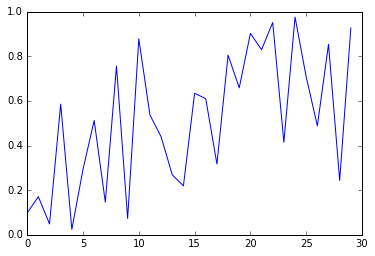

In [97]:
testdata = lcg(12,0,123,N=30)
plt.plot(testdata)

You should see some data that is certainly noisy but does it look random? Check a longer data set (N=100):

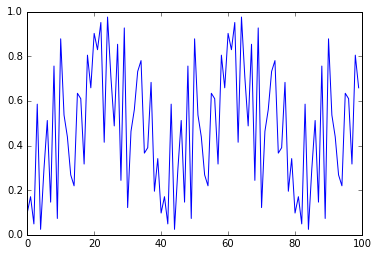

In [99]:
testdata = lcg(12,0,123,N=100)
plt.plot(testdata)

Here we start to see that this set appears periodic. How can we be sure?

## Autocorrelation:
The autocorrelation function is a measure of how correlated a data set is with itself. For example, the $\sin^2(x)$ function is always positive and oscillates between zero and 1. It is a highly regular, periodic data set. The correlation function measures the overlap or similarity between two data sets. Autocorrelation is simply the correlation of a data set with itself. It is defined as the integral of the product between the data and a shifted copy:
$$\int_{-\infty}^\infty f(t+\tau)f(t)dt$$
Visually we could imagine sliding a copy of the data across the original and looking at the area underneath where they overlap. As an example, for a sine function we would expect periodic behavior in the autocorrelation function because every sine-wave period, the original and the copy match up and give the integral a large value. This is shown below. There is a built-in `correlate` function so we just need to create a shifted copy of the data. Numpy has a method for this, the `.roll(m)` will shift elements of data by `m` values with wrapping around the end of the array. If `x = [1,2,3]` then `np.roll(x,2)` is `array([2, 3, 1])` so it moved the `1` two positions to the right:

In [160]:
x = [1,2,3]
np.roll(x,2)

array([2, 3, 1])

## Write a function `autocorr` that takes a data array as input and returns the autocorrelation:
Hint: somewhere in your function you should call: `np.correlate(data, np.roll(data, i))` where `i` is the integer amount to roll the data.

In [163]:
# Solution
def autocorr(data):    
    autocorr = []
    for i in range(len(data)):
        autocorr.append(np.correlate(data, np.roll(data,i)))
    
    return np.array(autocorr)

## Check your function on the `sin` data:

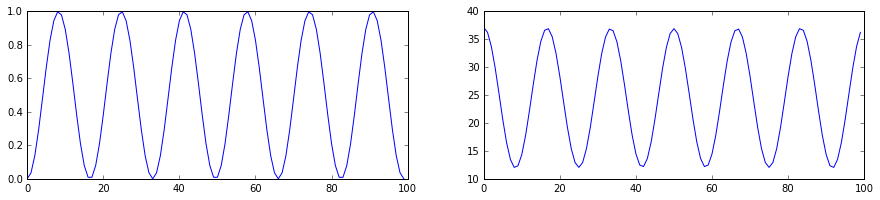

In [164]:
x = np.linspace(-3*np.pi,3*np.pi,100)
sindata = np.sin(x)**2
plt.figure(figsize=(15,3))
plt.subplot(121)
plt.plot(sindata)

plt.subplot(122)
plt.plot(autocorr(sindata))

Next, check the **`testdata`** you generated above. Is the autocorrelation nonzero?

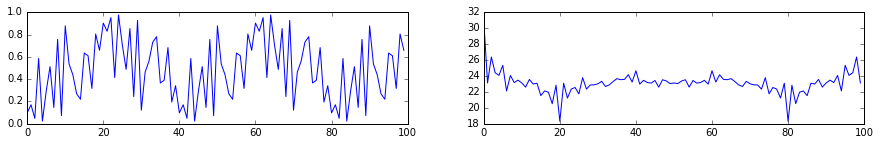

In [145]:
plt.figure(figsize=(15,2))
plt.subplot(121)
plt.plot(testdata)
plt.subplot(122)
plt.plot(autocorr(testdata))

# Try other parameters in the *linear congruential generator*
See how they affect the autocorrelation. Hint: use `a = 65539`, `b = 0`, and pick `c` values that are powers of 2. Larger `c` values give longer periods and therefore less correlation if we only generate a small number of points. Also, check the autocorrelation for many points. Explore up to `c = 2**31`.



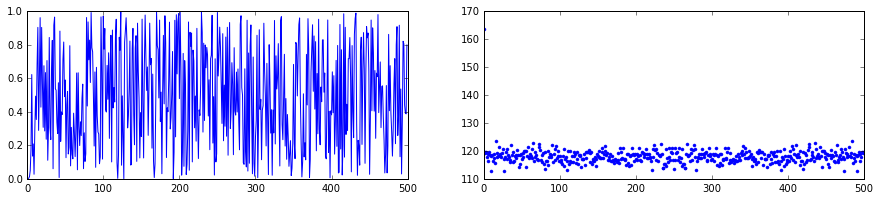

In [191]:
# Solution
test2data = lcg(65539,0,2**29,N=500)

plt.figure(figsize=(15,3))
plt.subplot(121)
plt.plot(test2data)

plt.subplot(122)
plt.plot(autocorr(test2data),".")

# The builtin methods
Below we import two random number generators (actually PRNGs).

In [146]:
import random as pyrand

In [147]:
import numpy.random as nprand

In [148]:
# Create a convenient function that uses one of these methods to generate an array of random data:
def randarray(N,a=0,b=100,method=pyrand):
    #return np.array([method.randint(a,b) for i in range(N)])
    return np.array([method.random() for i in range(N)])

In [149]:
N=10000

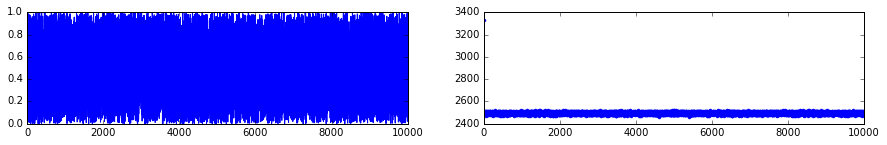

In [152]:
# Generate a random array with the python built-in.
pydata = randarray(N,method=pyrand)

plt.figure(figsize=(15,2))
plt.subplot(121)
plt.plot(pydata)
plt.subplot(122)
plt.plot(autocorr(pydata),".")

## We see no structure in the correlation outside of the unshifted data.

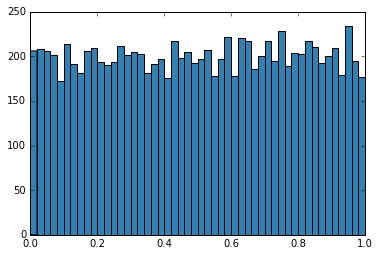

In [121]:
# Generate a random array with the python built-in.
pydata = randarray(N,method=pyrand)

grayblue = (0.2,0.5,0.7)  # a pleasant color

# Create a histogram to check the distribution:
n, bins, patches = plt.hist(pydata, bins=50, facecolor=grayblue)

#print(bins)
#pydata.sort()
#plt.plot(pydata)

In [ ]:
# Even better, do it ten times and plot them all:
for i in range(10):
    pydata = randarray(N,method=pyrand)

    # Create a histogram to check the distribution:
    n, bins, patches = plt.hist(pydata, bins=50, facecolor=grayblue, alpha=0.1)
    
    # The alpha=0.1 makes each histogram transparent so we can build up all of them.

Although the histogram varies each time, it is clear that the average is 100 for each bin.

## Repeat this to generate histograms for the other PRNGs (numpy, and RANDU)

In [ ]:
# Solution
for i in range(10):
    npdata = randarray(N,method=nprand)

    # Create a histogram to check the distribution:
    n, bins, patches = plt.hist(npdata, bins=50, facecolor=grayblue, alpha=0.1)
    
    # The alpha=0.1 makes each histogram transparent so we can build up all of them.

Implement the `randu` using the `lcg` that you already wrote.

In [192]:
# Implement the Randu:
def randu(N,seed=1):
    """Use the lcg function for this special case"""
    return lcg(65539,0,2**31,N=N,seed=seed)

In [ ]:
# Solution
randudata = randu(N)

n, bins, patches = plt.hist(randudata, 100, facecolor=grayblue, alpha=0.75)

In [ ]:
# Solution
for i in range(10):
    randudata = randu(N,seed=i+1)  # need to seed with different value!

    # Create a histogram to check the distribution:
    n, bins, patches = plt.hist(randudata, bins=50, facecolor=grayblue, alpha=0.1)
    
    # The alpha=0.1 makes each histogram transparent so we can build up all of them.

## Now check the autocorrelation to see how random it really is:

In [ ]:
from scipy.stats import linregress

In [ ]:
def corrFit(data):
    autocorr = np.correlate(data, data, mode='same')
    N = len(data)
    acorr = autocorr[0:N/2]

    x = range(len(acorr))
    
    plt.plot(acorr)
    regression = linregress(x,acorr)
    plt.plot(x,regression[0]*x + regression[1])
    print(regression)

In [ ]:
corrFit(pydata)

In [ ]:
corrFit(npdata)

In [ ]:
corrFit(randudata)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
%matplotlib notebook

In [ ]:
def plot3random(data):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    xs = data[0:-3:3]
    ys = data[1:-2:3]
    zs = data[2:-1:3]
    ax.scatter(xs, ys, zs)

In [ ]:
plot3random(randudata)

In [ ]:
plot3random(pydata)

In [ ]:
plot3random(cdata)

In [ ]:
plot3random(npdata)